In [1]:
import pandas as pd

In [88]:
data = pd.read_csv("loan_prediction_data.csv")

data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,1.0,0.0,0.000000,1.0,0.0,0.034014,0.00000,0.089725,0.743590,1.0,0.0,1.0
610,LP002979,0.0,1.0,1.000000,1.0,0.0,0.048930,0.00000,0.044863,0.358974,1.0,0.0,1.0
611,LP002983,0.0,1.0,0.333333,1.0,0.0,0.097984,0.00576,0.353111,0.743590,1.0,1.0,1.0
612,LP002984,0.0,1.0,0.666667,1.0,0.0,0.091936,0.00000,0.257598,0.743590,1.0,1.0,1.0
613,LP002990,1.0,0.0,0.000000,1.0,1.0,0.054830,0.00000,0.179450,0.743590,0.0,0.5,0.0


In [89]:
data.shape

(614, 13)

In [90]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [92]:
# data["Gender"] = data["Gender"].map({"Male":1, "Female":0})
# data["Married"] = data["Married"].map({"Yes":1, "No":0})
# data["Loan_Status"] = data["Loan_Status"].map({"N":0, "Y":1})

In [93]:
data.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [94]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [95]:
data.columns[0]

'Loan_ID'

In [96]:
data.drop(["Loan_ID"] , axis = 1, inplace = True)

In [97]:
# for i in data.columns:
#     data[i] = (data[i] - data[i].min()) / (data[i].max() - data[i].min())

In [98]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [99]:
x = data.drop(["Loan_Status"], axis = 1)

y = data['Loan_Status']

In [100]:
from sklearn.model_selection import train_test_split as tts

In [101]:
train_x, val_x, train_y, val_y = tts(x, y, random_state = 10 , test_size = 0.2 , stratify = y)

In [122]:
from keras import Model, Input
from keras.layers import Dense,concatenate


In [103]:
input_Features = x.shape[1]

In [104]:
hidden_nearon1 = 10
hidden_nearon2 = 5

output = 1

In [105]:
x = Input(shape = (input_Features,))

In [106]:
hidden_layer1 = Dense(units = hidden_nearon1, activation = "relu")(x)
hidden_layer2 = Dense(units = hidden_nearon2, activation = "relu")(hidden_layer1)
output_layer = Dense(units = output, activation = "sigmoid")(hidden_layer2)

In [107]:
functional_mode = Model(x,output_layer)

In [109]:
functional_mode.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [110]:
functional_mode.compile(loss = "binary_crossentropy", optimizer = "Adam" , metrics = ["accuracy"])

In [111]:
history =  functional_mode.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3176 - loss: 0.7216 - val_accuracy: 0.4390 - val_loss: 0.7012
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4414 - loss: 0.7001 - val_accuracy: 0.5772 - val_loss: 0.6837
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6280 - loss: 0.6813 - val_accuracy: 0.6504 - val_loss: 0.6685
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6685 - loss: 0.6667 - val_accuracy: 0.6748 - val_loss: 0.6518
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6860 - loss: 0.6533 - val_accuracy: 0.6992 - val_loss: 0.6182
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6813 - loss: 0.6272 - val_accuracy: 0.6992 - val_loss: 0.5934
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7129 - loss: 0.5868 - val_accuracy: 0.6992 - val_loss: 0.5825
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7009 - loss: 0.5855 - val_accuracy: 0.7073 - val_loss

In [112]:
import matplotlib.pyplot as plt

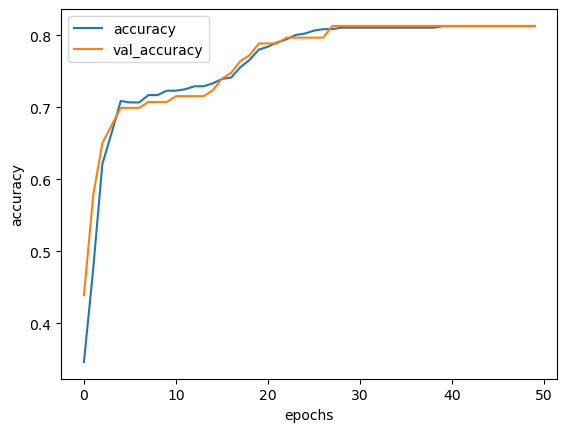

In [117]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

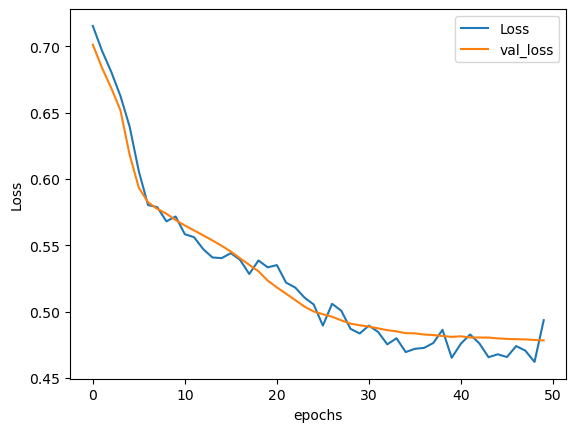

In [118]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["Loss","val_loss"])
plt.show()

In [147]:
x = Input(shape = (input_Features,))
hidden_layer1_1 = Dense(units = 20, activation = "relu")(x)
hidden_layer1_2 = Dense(units = 10, activation = "relu")(x)

compain  = concatenate([hidden_layer1_1, hidden_layer1_2])

hidden_layer2 = Dense(units = hidden_nearon2, activation = "relu")(hidden_layer1_2)
hidden_layer3 = Dense(units = 10, activation = "relu")(hidden_layer2)
output_layer = Dense(units = output, activation = "sigmoid")(hidden_layer3)

model = Model(x,output_layer)

In [148]:
model.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 10)                  │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 246 (984.00 B)

 Trainable params: 246 (984.00 B)

 Non-trainable params: 0 (0.00 B)

In [149]:
model.compile(loss = "binary_crossentropy", optimizer = "Adam", metrics  = ["accuracy"])

In [150]:
history =  functional_mode.fit(train_x, train_y, validation_data = (val_x, val_y), epochs = 50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8428 - loss: 0.3933 - val_accuracy: 0.8049 - val_loss: 0.5287
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8256 - loss: 0.4149 - val_accuracy: 0.7967 - val_loss: 0.5312
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8292 - loss: 0.4087 - val_accuracy: 0.8049 - val_loss: 0.5314
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8170 - loss: 0.4133 - val_accuracy: 0.8049 - val_loss: 0.5310
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8109 - loss: 0.4164 - val_accuracy: 0.8049 - val_loss: 0.5315
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8242 - loss: 0.4032 - val_accuracy: 0.8049 - val_loss: 0.5303
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8119 - loss: 0.4376 - val_accuracy: 0.8049 - val_loss: 0.5317
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8260 - loss: 0.4156 - val_accuracy: 0.8049 - val_loss:

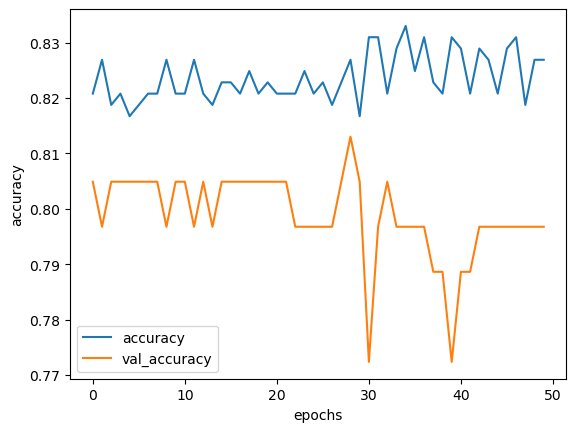

In [151]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["accuracy","val_accuracy"])
plt.show()

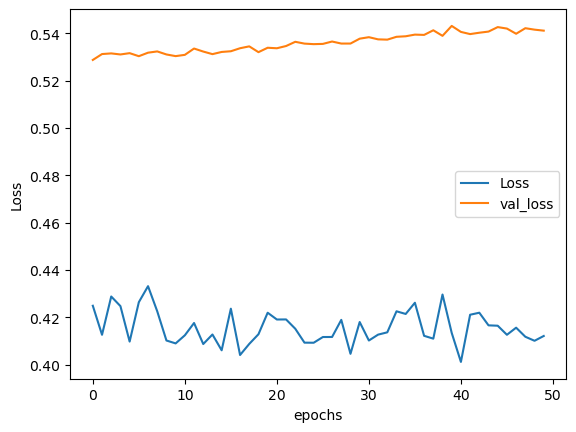

In [152]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(["Loss","val_loss"])
plt.show()